In [1]:
# import the necessary libraries
import json
import csv
import pandas as pd
import numpy as np
import re

In [2]:
# load input file into dataframe

df = pd.read_json('train.json')

In [3]:
# look for null values and data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13276 entries, 0 to 13275
Data columns (total 68 columns):
_score                                             13276 non-null float64
_source_ask                                        13276 non-null object
_source_coachable                                  13276 non-null object
_source_country_code                               13276 non-null object
_source_discoverable                               13276 non-null object
_source_sponsored_campaign                         13276 non-null object
_source_sponsorship_active                         13276 non-null object
_source_user_state                                 13276 non-null object
filename                                           13276 non-null object
highlight_ask                                      13276 non-null object
highlight_description                              13276 non-null object
highlight_letter_body                              13276 non-null object
highlight_targ

In [4]:
# check no. of rows and cols
df.shape

(13276, 68)

In [5]:
#df.columns
len(df['petition_id'])

13276

In [6]:
# check the tot number of petition_categories
df['petition_category'].value_counts()

tax                  4475
education            4151
health care          2625
infrastructure       1279
environment issue     746
Name: petition_category, dtype: int64

In [8]:
# manual observation of var. features
df['petition_description']

#Observation - This column needs to be cleaned since it contains 'HTML Tags','newline character', etc.

0        <p><strong>MTA, NYCT and LIRR - South Queens N...
1        <p>To, <br>The Vice Chancellor,<br>MAKAUT<br><...
2        <p><em><strong><a href="https://www.change.org...
3        <p>Please Give Fellowship to the Research Fell...
4        <p>People live in fear when they use Marijuana...
5        <p>Request made before the Chairman, CBDT.</p>...
6        <p>With reference to the above mentioned subje...
7        <p>Help us make the Government fulfil its prom...
8        <p>As you could readily agree with, by subsidi...
9        <p>I want to bring to light a common, but not ...
10       <p>Urge our city council members to vote <em>N...
11       <p>The hiring of a paid Chief for Bethel Volun...
12       <p>The Budget Committee in Rhode Island has pr...
13       <p>According to Plastic Pollution Coalition, 5...
14       <p> </p>\n<p>Railway Zone at Vizag</p>\n<p>We ...
15       <p>These issues are central to the globalized ...
16       <p>Dear Freeport Residents and Property Owners.

In [9]:

# dataset cleaning process
    
# converting to NaN values
df.replace(to_replace=['None'], value=np.nan, inplace=True)
df.replace(to_replace=[''], value=np.nan, inplace=True)
df.replace(to_replace=['\n'], value='', inplace=True)

In [10]:
df

,_score,_source_ask,_source_coachable,_source_country_code,_source_discoverable,_source_sponsored_campaign,_source_sponsorship_active,_source_user_state,filename,highlight_ask,...,petition_slug,petition_sponsored_campaign,petition_targeting_description,petition_title,petition_total_signature_count,petition_user_city,petition_user_country_code,petition_user_description,petition_user_state_code,petition_weekly_signature_count
0,2.379138,"MTA, LIRR, NYCT: South Queens Needs Transit!",False,US,True,False,True,NY,textfile_1010.json,['Use public <mark>infrastructure</mark> for s...,...,mta-lirr-nyct-south-queens-needs-transit,False,"NYC Metropolitan Transportation Authority, New...","MTA, LIRR, NYCT: South Queens NEEDS TRANSIT!",738,Rockaway Beach,US,Communications director for Assemblywoman Stac...,NY,0
1,1.328393,An amendement,False,IN,True,False,NaN,AL,textfile_2550.json,[' used in the billions of dollars worth of St...,...,the-vice-chancellor-an-amendement,False,"The Vice Chancellor, Makaut",The Vice Chancellor: An amendement,71,NaN,IN,NaN,NaN,0
2,1.714490,380 Children Without a Permanent School Need Y...,False,CA,True,False,True,GA,textfile_9190.json,['Pressure State Legislature for more Police D...,...,380-children-without-a-permanent-school-need-y...,False,Justin Trudeau,380 Children Without a Permanent School Need Y...,217,Vancouver,CA,NaN,NaN,0
3,1.917518,"Please Give Fellowship to the UGC, CSIR, DST J...",False,IN,True,False,True,WB,textfile_7540.json,['Take Back UNESCO Prize for Peace <mark>Educa...,...,smriti-zubin-irani-please-give-fellowship-to-t...,False,Smriti Zubin Irani,NaN,283,Kolkata,IN,NaN,NaN,0
4,1.299582,Legalize recreational use of Marijuana in Nort...,False,US,True,False,True,ENG,textfile_6190.json,['State of Virginia: Institute a wealth <mark>...,...,north-carolina-state-house-legalize-recreation...,False,"North Carolina State House, North Carolina Sta...",North Carolina State House: Legalize recreatio...,67,NaN,US,NaN,NaN,0
5,0.497756,"Dear Sri. Sushil Chandra, Please help us link ...",False,IN,True,False,NaN,DC,textfile_9280.json,['Wildlife Gun <mark>Tax</mark> is Misguided: ...,...,cbdt-dear-sri-sushil-chandra-please-help-us-li...,False,"CBDT, Sri. Sushil Chandra, Chairman CBDT","CBDT: Dear Sri. Sushil Chandra, Please help us...",7,Челябинск,IN,NaN,NaN,0
6,1.544301,"Permanent Vice Chancellor, basic needs for Dr....",False,IN,True,False,NaN,GA,textfile_2270.json,['Create bicycle <mark>infrastructure</mark> i...,...,vajubai-vala-permanent-vice-chancellor-basic-n...,False,"Vajubai vala, G.T.Devegowda","Vajubai vala: Permanent Vice Chancellor, basic...",112,NaN,IN,NaN,NaN,0
7,1.732526,Say NO to reducing Early Years Funding in Nort...,False,GB,True,False,True,ENG,textfile_9060.json,['Opt for proper authenticated <mark>education...,...,st-john-s-playgroup-say-no-to-reducing-early-y...,False,greeningj@parliment.uk,St John's Playgroup: Say NO to reducing Early ...,184,Harrogate,GB,NaN,ENG,0
8,2.829885,We can tax gas,False,US,True,False,True,MN,textfile_1150.json,['We can <mark>tax</mark> gas'],...,we-can-tax-gas,False,President of the United States,We can tax gas,99,Moorhead,US,Disabled Greens News + discussion:\r\nhttp://w...,MN,0
9,1.339790,Premature babies born alive should be given fu...,False,CA,True,False,True,WA,textfile_5260.json,['Premature babies born alive should be given ...,...,justin-trudeau-premature-babies-born-alive-sho...,False,"Justin Trudeau, Donald J. Trump, Christine Ell...",Justin Trudeau: Premature babies born alive sh...,26,NaN,US,NaN,WA,0


In [11]:
#functions to clean html tags <> and other \n occurences

def cleanhtml(raw_html):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', raw_html)
    return cleantext

In [12]:
df['petition_description']=df['petition_description'].apply(cleanhtml)

In [13]:
df['highlight_ask'] = df['highlight_ask'].apply(cleanhtml)

In [14]:
def cleann(raw_html):
    cleanr = re.compile('\n')
    cleantext = re.sub(cleanr, '', raw_html)
    return cleantext

In [15]:
df['petition_description']=df['petition_description'].apply(cleann)

In [16]:
df.shape

(13276, 68)

In [18]:
# verifying if the functions are working properly\
df['petition_description'].head()

0    MTA, NYCT and LIRR - South Queens Needs Real T...
1    To, The Vice Chancellor,MAKAUTSir,This is to i...
2    FRANCAISHistoryIn 2001, the site of École Rose...
3    Please Give Fellowship to the Research Fellows...
4    People live in fear when they use Marijuana fo...
Name: petition_description, dtype: object

In [21]:
df['petition_description']

0        MTA, NYCT and LIRR - South Queens Needs Real T...
1        To, The Vice Chancellor,MAKAUTSir,This is to i...
2        FRANCAISHistoryIn 2001, the site of École Rose...
3        Please Give Fellowship to the Research Fellows...
4        People live in fear when they use Marijuana fo...
5        Request made before the Chairman, CBDT.Sir,The...
6        With reference to the above mentioned subject,...
7        Help us make the Government fulfil its promise...
8        As you could readily agree with, by subsidizin...
9        I want to bring to light a common, but not wel...
10       Urge our city council members to vote NO to th...
11       The hiring of a paid Chief for Bethel Voluntee...
12       The Budget Committee in Rhode Island has propo...
13       According to Plastic Pollution Coalition, 500 ...
14        Railway Zone at VizagWe the citizens of India...
15       These issues are central to the globalized wor...
16       Dear Freeport Residents and Property Owners,  .

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

(array([45.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,
         0.,  3.,  1.,  0.,  0.,  0.,  0.,  2.,  2.,  5.,  4.,  2.]),
 array([    0.  ,   531.04,  1062.08,  1593.12,  2124.16,  2655.2 ,
         3186.24,  3717.28,  4248.32,  4779.36,  5310.4 ,  5841.44,
         6372.48,  6903.52,  7434.56,  7965.6 ,  8496.64,  9027.68,
         9558.72, 10089.76, 10620.8 , 11151.84, 11682.88, 12213.92,
        12744.96, 13276.  ]),
 <a list of 25 Patch objects>)

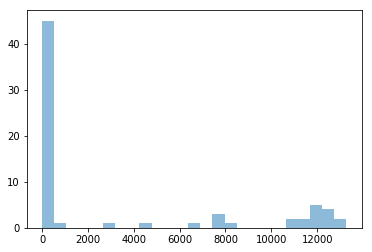

In [20]:
# checking the columns with missing values present

missing_cols = df.isnull().sum()
plt.hist(missing_cols, bins = 25, alpha = 0.5)

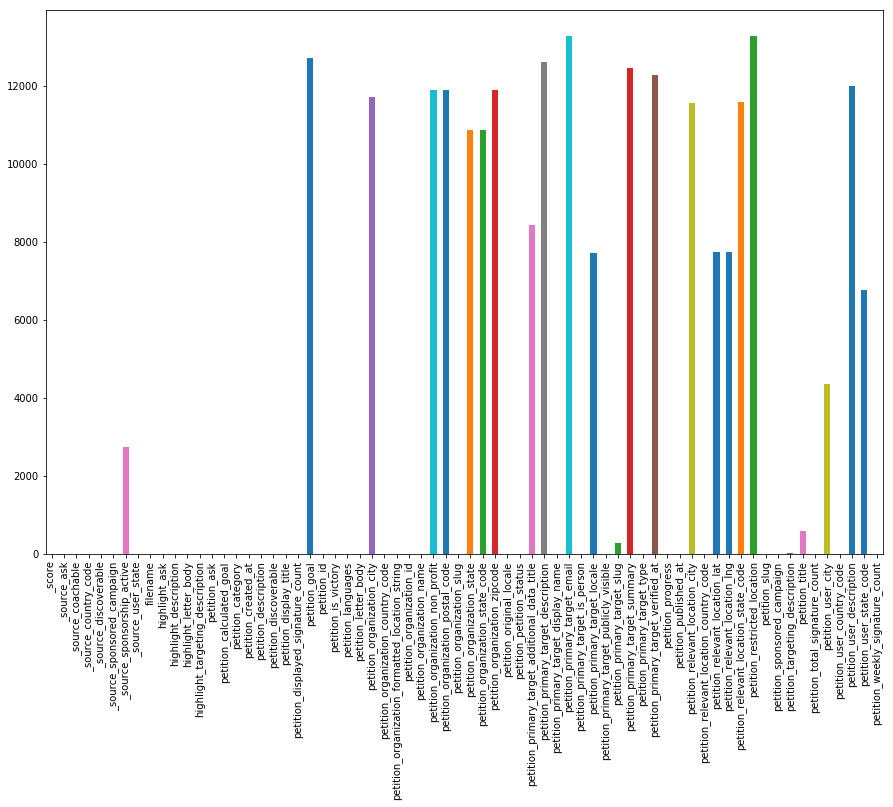

In [22]:
missing_cols.plot.bar(figsize=(15,10))
plt.show()
# Observation - Lots of columns/features having majority of 'Missing values'; better to drop those columns since the ML model..
# ..wouldn't have sufficient information to learn from them

In [26]:
# the outlier columns - i.e. cols with missing or unknown values with more than 20%
# 20 % is the benchmark value decided by us by looking at the above graph
missing_20 = [col for col in df.columns if (df[col].isnull().sum()/df.shape[0]) * 100 > 20]
print(len(missing_20))
for cols in missing_20:
    del df[cols]

22


(array([44.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  0.  ,  24.04,  48.08,  72.12,  96.16, 120.2 , 144.24, 168.28,
        192.32, 216.36, 240.4 , 264.44, 288.48, 312.52, 336.56, 360.6 ,
        384.64, 408.68, 432.72, 456.76, 480.8 , 504.84, 528.88, 552.92,
        576.96, 601.  ]),
 <a list of 25 Patch objects>)

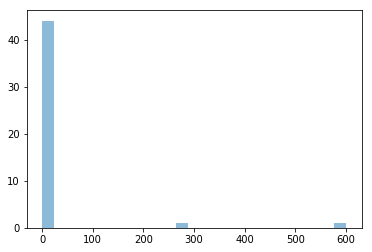

In [27]:
missing_20 = df.isnull().sum()
#plt.hist(missing_cols, bins = 25, alpha = 0.5)
#df1 = 
plt.hist(missing_20, bins = 25, alpha = 0.5)

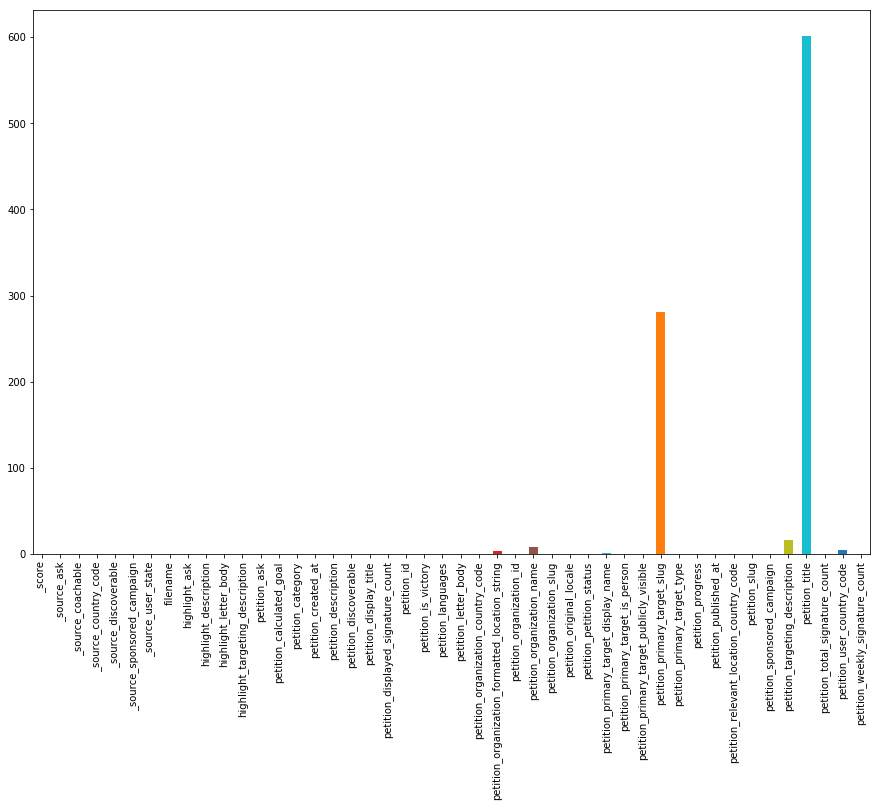

In [28]:
missing_20.plot.bar(figsize=(15,10))
plt.show()

In [29]:
# checking number of missing vals
useless = list(missing_20)
print(useless)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 8, 0, 0, 0, 1, 0, 0, 281, 0, 0, 0, 0, 0, 0, 16, 601, 0, 5, 0]


In [30]:
df.shape
# No. of features has reduced

(13276, 46)

In [31]:
# checking number of missing vals in rows(row-wise)
missing_rows = df.isnull().sum(axis=1)

In [32]:
missing_rows.value_counts().sort_values()

2       74
1      768
0    12434
dtype: int64

In [33]:
rows_with_missing_few = missing_rows[missing_rows <= 1]
rows_with_missing_large = missing_rows[missing_rows > 1]
print(len(rows_with_missing_few))
print(len(rows_with_missing_large))

13202
74


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13276 entries, 0 to 13275
Data columns (total 46 columns):
_score                                             13276 non-null float64
_source_ask                                        13276 non-null object
_source_coachable                                  13276 non-null object
_source_country_code                               13276 non-null object
_source_discoverable                               13276 non-null object
_source_sponsored_campaign                         13276 non-null object
_source_user_state                                 13276 non-null object
filename                                           13276 non-null object
highlight_ask                                      13276 non-null object
highlight_description                              13276 non-null object
highlight_letter_body                              13276 non-null object
highlight_targeting_description                    13276 non-null object
petition_ask  

In [35]:
# mining the information from highlight_description columns
# beucase the higlighted part is found to be the 'petition_category' itself
def find_between(s, start = '<mark>', end = '</mark>'):
    return (s.split(start))[1].split(end)[0]

In [36]:
def low(s):
    return (s.lower())

In [37]:
df['new_feature_category'] = df['highlight_description'].apply(find_between)
df['new_feature_category'] = df['new_feature_category'].apply(low)

In [38]:
# further are the steps to check the categorical variables

df['petition_petition_status'].value_counts()

closed     6532
active     5406
victory    1338
Name: petition_petition_status, dtype: int64

In [39]:
df['petition_primary_target_type'].value_counts()


Custom        12004
Politician      800
Group           354
Role            118
Name: petition_primary_target_type, dtype: int64

In [40]:
# binary variables by manual observation

tORf = ['_source_coachable', '_source_discoverable', '_source_sponsored_campaign', 'petition_discoverable',
        'petition_primary_target_is_person', 'petition_primary_target_publicly_visible',
        'petition_sponsored_campaign']

In [41]:
# similar vars
country  = ['_source_country_code', 'petition_organization_country_code', 'petition_organization_formatted_location_string', 
'petition_relevant_location_country_code', 'petition_user_country_code']

In [42]:
# replacing the values to use further in ML models

vals_to_replace = {"True":1, "False":0}
df['petition_is_victory'] = df['petition_is_victory'].map(vals_to_replace)

In [43]:
for cc in tORf:
    df[cc] = df[cc].map(vals_to_replace)

In [44]:
vals_to_replace = {"Custom":0, "Politician":1, "Group":2, "Role":3}
df['petition_primary_target_type'] = df['petition_primary_target_type'].map(vals_to_replace)
df['petition_primary_target_type'].value_counts()


0    12004
1      800
2      354
3      118
Name: petition_primary_target_type, dtype: int64

In [45]:
vals_to_replace = {"closed":0, "active":1, "victory":2}
df['petition_petition_status'] = df['petition_petition_status'].map(vals_to_replace)
df['petition_petition_status'].value_counts()

0    6532
1    5406
2    1338
Name: petition_petition_status, dtype: int64

In [46]:
vals_to_replace = {"tax":0, "education":1, "health care":2, "infrastructure":3, "environment issue":4}
df['petition_category'] = df['petition_category'].map(vals_to_replace)
df['petition_category'].value_counts()

0    4475
1    4151
2    2625
3    1279
4     746
Name: petition_category, dtype: int64

In [48]:
#df['days'] = df['petition_published_at'] - df['petition_created_at']

In [47]:
df['petition_languages'].value_counts()

['en']                                  12902
['en', 'es']                               82
['en', 'fr']                               68
['ar', 'en']                               17
['de', 'en']                               14
['en', 'tr']                               10
['en', 'it']                               10
['fr']                                      7
['en', 'hi']                                7
['el', 'en']                                7
['en', 'ja']                                6
['en', 'th']                                6
['en', 'pt']                                6
['en', 'zh']                                6
['en', 'zh-Hant']                           6
['en', 'ru']                                6
['cy', 'en']                                5
['en', 'ko']                                5
['en', 'es', 'fr']                          5
['en', 'hy', 'ru']                          4
['en', 'tl']                                4
['en', 'nl']                      

In [48]:
df[['_source_country_code', 'petition_organization_country_code', 'petition_organization_formatted_location_string', 
'petition_relevant_location_country_code', 'petition_user_country_code']]

,_source_country_code,petition_organization_country_code,petition_organization_formatted_location_string,petition_relevant_location_country_code,petition_user_country_code
0,US,US,United States,US,US
1,IN,IN,India,IN,IN
2,CA,US,United States,CA,CA
3,IN,IN,India,IN,IN
4,US,CA,Canada,US,US
5,IN,US,United States,IN,IN
6,IN,US,United States,IN,IN
7,GB,GB,United Kingdom,GB,GB
8,US,GB,United Kingdom,US,US
9,CA,US,United States,CA,US


In [49]:
df[['_source_country_code', 'petition_is_victory']]

,_source_country_code,petition_is_victory
0,US,0
1,IN,0
2,CA,0
3,IN,1
4,US,0
5,IN,0
6,IN,1
7,GB,0
8,US,0
9,CA,0


In [50]:
corr = df.corr()

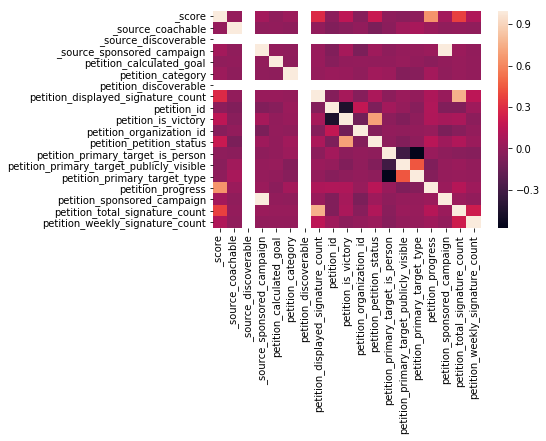

In [51]:
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [52]:
from scipy.stats.stats import pearsonr
col1 = df['_source_sponsored_campaign'].values
col2 = df['petition_is_victory'].values
corr , _ = pearsonr(col1, col2)

In [53]:
corr

0.07336927256952594

In [54]:
df['new_feature_category'].value_counts()
vals_to_replace = {"tax":0, "education":1, "health":2, "care":2, "infrastructure":3, "environment":4, "issue":4}
df['new_feature_category'] = df['new_feature_category'].map(vals_to_replace)
df['new_feature_category'].value_counts()


0    4475
1    4151
2    2625
3    1279
4     746
Name: new_feature_category, dtype: int64

In [55]:
#type(df.groupby(['petition_category', 'petition_is_victory']).groups)
df_test1 = df[['new_feature_category', 'petition_petition_status', 
               'petition_progress',
              'petition_total_signature_count']]

In [103]:
grp_dict = df.groupby(['petition_category', 'petition_is_victory']).groups
grp_dict

{(0,
  0): Int64Index([    4,     5,     8,    11,    16,    17,    18,    19,    21,
                23,
             ...
             13240, 13246, 13247, 13249, 13252, 13254, 13260, 13262, 13268,
             13275],
            dtype='int64', length=4198),
 (0,
  1): Int64Index([   48,    67,   229,   360,   405,   475,   541,   557,   685,
               696,
             ...
             12948, 12990, 13036, 13050, 13058, 13081, 13132, 13157, 13242,
             13243],
            dtype='int64', length=277),
 (1,
  0): Int64Index([    2,     7,    12,    20,    26,    27,    34,    36,    37,
                39,
             ...
             13256, 13257, 13258, 13259, 13261, 13263, 13264, 13265, 13266,
             13273],
            dtype='int64', length=3517),
 (1,
  1): Int64Index([    3,    25,    82,    84,    95,   105,   194,   272,   278,
               400,
             ...
             13072, 13100, 13106, 13107, 13119, 13131, 13139, 13145, 13158,
             13211]

In [56]:
from sklearn.model_selection import train_test_split

# Split the 'features' and 'petition_category' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_test1, 
                                                    df['petition_category'], 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 10620 samples.
Testing set has 2656 samples.


In [57]:
def acc_res():
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    # fbeta_score(y_true_values, y_predicted_values_by_classifiers, beta_value)
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta = 0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta = 0.5)

In [58]:
from sklearn.naive_bayes import GaussianNB

In [59]:
# Naive Bayes Classifier -  assuming less or no dependence of features based on 'correlation matrix'

clf = GaussianNB()
a = clf.fit(X_train, y_train)

In [60]:
predict = a.predict(X_test)

In [61]:
#predict = a.predict(X_test)
from sklearn import metrics
acc1 = metrics.accuracy_score(y_test, predict)
f_beta1 = metrics.fbeta_score(y_test, predict, beta = 0.5, average = 'micro')

In [62]:
# Support Vector Machines

from sklearn.svm import SVC
clf_B = SVC(random_state = 5)

b = clf_B.fit(X_train, y_train)
predict = b.predict(X_test)

In [64]:
acc2 = metrics.accuracy_score(y_test, predict)
f_beta2 = metrics.fbeta_score(y_test, predict, beta = 0.5, average = 'micro')

In [65]:
#K-Nearest Neighbour Classifier 

from sklearn.neighbors import KNeighborsClassifier
clf_C = KNeighborsClassifier(1)
c = clf_C.fit(X_train, y_train) 

predict = c.predict(X_test)

In [66]:
acc3 = metrics.accuracy_score(y_test, predict)
f_beta3 = metrics.fbeta_score(y_test, predict, beta = 0.5, average = 'micro')

# Comparision for various ML models used

In [67]:

print("Accuracy for Naive Bayes = ", acc1,"\tf_beta for Naive Bayes = ", f_beta1,
      "\nAccuracy for SVM = ", acc2, "\tf_beta for SVM = ", f_beta2,
      "\nAccuracy for KNN = ", acc3,  "\tf_beta for KNN = ", f_beta3)

Accuracy for Naive Bayes =  0.9484186746987951 	f_beta for Naive Bayes =  0.9484186746987953 
Accuracy for SVM =  0.7458584337349398 	f_beta for SVM =  0.7458584337349398 
Accuracy for KNN =  0.7055722891566265 	f_beta for KNN =  0.7055722891566265


## Testing on 'Validation Data'

In [68]:
df_vd = pd.read_json('validation.json')
len(df_vd['petition_id'])

13277

In [69]:
# using the same cleaning process as used above
# for the validation dataset

df_vd = pd.read_json('validation.json')

df_vd.replace(to_replace=['None'], value=np.nan, inplace=True)
df_vd.replace(to_replace=[''], value=np.nan, inplace=True)
df_vd.replace(to_replace=['\n'], value='', inplace=True)


def cleanhtml(raw_html):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', raw_html)
    return cleantext

df_vd['petition_description']=df_vd['petition_description'].apply(cleanhtml)
missing_20 = [col for col in df_vd.columns if (df_vd[col].isnull().sum()/df_vd.shape[0]) * 100 > 20]
print(len(missing_20))
for cols in missing_20:
    del df_vd[cols]
def find_between(s, start = '<mark>', end = '</mark>'):
    return (s.split(start))[1].split(end)[0]
def low(s):
    return (s.lower())
df_vd['new_feature_category'] = df_vd['highlight_description'].apply(find_between)
df_vd['new_feature_category'] = df_vd['new_feature_category'].apply(low)
tORf = ['_source_coachable', '_source_discoverable', '_source_sponsored_campaign', 'petition_discoverable',
        'petition_primary_target_is_person', 'petition_primary_target_publicly_visible',
        'petition_sponsored_campaign']
for cc in tORf:
    df_vd[cc] = df_vd[cc].map(vals_to_replace)
vals_to_replace = {"Custom":0, "Politician":1, "Group":2, "Role":3}
df_vd['petition_primary_target_type'] = df_vd['petition_primary_target_type'].map(vals_to_replace)
df_vd['petition_primary_target_type'].value_counts()
vals_to_replace = {"closed":0, "active":1, "victory":2}
df_vd['petition_petition_status'] = df_vd['petition_petition_status'].map(vals_to_replace)
df_vd['petition_petition_status'].value_counts()
df_vd['new_feature_category'].value_counts()
vals_to_replace = {"tax":0, "education":1, "health":2, "care":2, "infrastructure":3, "environment":4, "issue":4}
df_vd['new_feature_category'] = df_vd['new_feature_category'].map(vals_to_replace)
df_vd['new_feature_category'].value_counts()
df_test1_vd = df_vd[['new_feature_category', 'petition_petition_status', 
               'petition_progress',
              'petition_total_signature_count']]


22


In [71]:
df_vd

,_score,_source_ask,_source_coachable,_source_country_code,_source_discoverable,_source_sponsored_campaign,_source_user_state,filename,highlight_ask,highlight_description,...,petition_published_at,petition_relevant_location_country_code,petition_slug,petition_sponsored_campaign,petition_targeting_description,petition_title,petition_total_signature_count,petition_user_country_code,petition_weekly_signature_count,new_feature_category
0,5.126362,The Pension must be Tax-free.,NaN,IN,NaN,NaN,AL,textfile_0.json,['The Pension must be <mark>Tax</mark>-free.'],[' income and is liable for Income <mark>Tax</...,...,2017-11-01 06:14:52,IN,whether-pension-be-taxed,NaN,"Prime Minister of India, Sri Narendra Modi Ji,...",Whether Pension be Taxed?,161265,IN,0,0
1,4.930810,Support the TRUMP Act: No Presidency without T...,NaN,US,NaN,NaN,NY,textfile_0.json,['Support the TRUMP Act: No Presidency without...,[' by the 2016 election. This bill deserves an...,...,2016-12-07 15:07:44,US,support-the-trump-act-no-presidency-without-ta...,NaN,New York State Senate,Support the TRUMP Act: No Presidency without T...,141138,US,0,0
2,4.896383,Axe #TamponTax before 2022!,NaN,GB,NaN,NaN,ENG,textfile_10.json,['Support the TRUMP Act: No Presidency without...,['Our Tampon <mark>Tax</mark> petition succeed...,...,2018-01-22 12:33:17,GB,philip-hammond-axe-tampon-tax-before-2022,NaN,"Philip Hammond, Chancellor of the Exchequer",Philip Hammond: Axe Tampon Tax before 2022!,78520,GB,125,0
3,4.750908,Petition to Arun Jaitley for removal of tax on...,NaN,IN,NaN,NaN,NY,textfile_10.json,['Petition to Arun Jaitley for removal of <mar...,[' forefront a long pending demand of various ...,...,2017-03-07 12:39:40,IN,arunjaitley-taxfreewings-petition-for-removal-...,NaN,Arun Jaitley,.@arunjaitley: #TaxFreeWings: Petition for rem...,404368,IN,0,0
4,4.750908,Abolish GST (Tax) from Langar (free meal) serv...,NaN,IN,NaN,NaN,ENG,textfile_10.json,['Abolish GST (<mark>Tax</mark>) from Langar (...,[' forefront a long pending demand of various ...,...,2018-02-15 18:13:49,IN,government-of-india-abolish-gst-tax-from-langa...,NaN,"Government of India, Finance Minister of India",GOVERNMENT OF INDIA : Abolish GST (Tax) from L...,123295,GB,316,0
5,4.744649,"Not One Penny in Tax Cuts for Millionaires, Bi...",NaN,US,NaN,NaN,WA,textfile_10.json,['Not One Penny in <mark>Tax</mark> Cuts for M...,[' to say that it would be criminally stupid f...,...,2017-08-02 19:34:15,US,congress-not-one-penny-in-tax-cuts-for-million...,NaN,"U.S. Senate, U.S. House of Representatives, Do...",Congress: Not One Penny in Tax Cuts for Millio...,78496,US,0,0
6,4.738545,Drop period prices by 5% and help to end Tampo...,NaN,GB,NaN,NaN,ENG,textfile_10.json,['Drop period prices by 5% and help to end Tam...,"['320,000 amazing\xa0people have signed our pe...",...,2017-08-08 15:30:17,GB,sainsbury-drop-the-price-of-period-products-by...,NaN,"Sainsbury, MORRISONS, asda",Sainsbury: Drop the price of period products b...,68033,GB,0,0
7,4.100430,Pass the Marijuana Justice Act,NaN,US,NaN,NaN,DC,textfile_100.json,"[""Oppose MAVCOM's Travel <mark>Tax</mark>""]","[' serious crime, and generate millions of dol...",...,2017-08-21 17:33:23,US,congress-pass-the-marijuana-justice-act,NaN,U.S. Senate,Congress: Pass the Marijuana Justice Act,57750,US,0,0
8,4.095828,Urge the Canadian Government to offer incentiv...,NaN,CA,NaN,NaN,DC,textfile_100.json,"[""Oppose MAVCOM's Travel <mark>Tax</mark>""]","[' currently offers\xa0up to $7,500 USD income...",...,2016-08-01 23:51:19,CA,government-of-canada-federal-incentives-for-ca...,NaN,"Government of Canada, Marc Garneau, Justin Tru...",Government of Canada: Federal incentives for C...,32247,CA,61,0
9,4.094686,Bank of America: Don't Let a Veteran's Family ...,NaN,US,NaN,NaN,CA,textfile_100.json,"[""Oppose MAVCOM's Travel <mark>Tax</mark>""]",[' continually lost and then requested replace...,...,2012-02-06 18:03:24,US,bank-of-america-don-t-let-a-veteran-s-family-l...,NaN,Ms. Supriya Katyal,Bank of Amer

In [70]:
df_test1_vd

,new_feature_category,petition_petition_status,petition_progress,petition_total_signature_count
0,0,0,80.632500,161265
1,0,0,94.092000,141138
2,0,1,52.346667,78520
3,0,2,80.873600,404368
4,0,1,82.196667,123295
5,0,0,52.330667,78496
6,0,0,90.710667,68033
7,0,0,77.000000,57750
8,0,1,92.802857,32247
9,0,2,99.732000,99732


In [71]:
predict_vd = a.predict(df_test1_vd) # -- using NB Clf
len(predict_vd)

13277

In [72]:
# Classification of 'petition_category' completed
type(predict_vd)
unique, counts = np.unique(predict_vd, return_counts=True)

print(np.asarray((unique, counts)).T)

[[   0 4677]
 [   1 4006]
 [   2 2629]
 [   3 1194]
 [   4  771]]


In [73]:
corr = df.corr()

In [74]:
corr_vd = df_vd.corr()

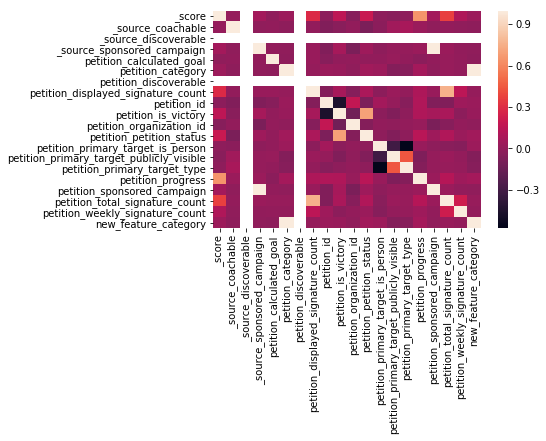

In [75]:
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

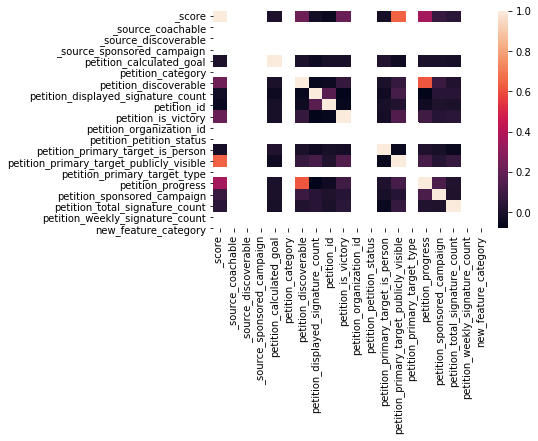

In [76]:
sns.heatmap(corr_vd, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [77]:
# for prediction of 'petition_is_victory' following columns have been used

df_test2 = df[['new_feature_category', 'petition_petition_status', 
               'petition_progress',
              'petition_total_signature_count']]

In [78]:
df_vd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13277 entries, 0 to 13276
Data columns (total 45 columns):
_score                                             13277 non-null float64
_source_ask                                        13277 non-null object
_source_coachable                                  0 non-null float64
_source_country_code                               13277 non-null object
_source_discoverable                               0 non-null float64
_source_sponsored_campaign                         0 non-null float64
_source_user_state                                 13277 non-null object
filename                                           13277 non-null object
highlight_ask                                      13277 non-null object
highlight_description                              13277 non-null object
highlight_letter_body                              13277 non-null object
highlight_targeting_description                    13277 non-null object
petition_ask           

In [79]:
X_train, X_test, y_train, y_test = train_test_split(df_test2, 
                                                    df['petition_is_victory'], 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 10620 samples.
Testing set has 2656 samples.


In [80]:
clf2 = GaussianNB()
ab = clf2.fit(X_train, y_train)

In [81]:
predict2 = ab.predict(X_test)
#from sklearn import metrics
acc1 = metrics.accuracy_score(y_test, predict2)
f_beta1 = metrics.fbeta_score(y_test, predict2, beta = 0.5)

In [82]:
#from sklearn.svm import SVC
# https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html -- ref
# Support Vector Machine - because of high accuracy
clf_B2 = SVC(random_state = 5)

b2 = clf_B2.fit(X_train, y_train)
predictb = b2.predict(X_test)

In [83]:
acc2 = metrics.accuracy_score(y_test, predictb)
f_beta2 = metrics.fbeta_score(y_test, predictb, beta = 0.5)

In [84]:
from sklearn.linear_model import SGDClassifier 
clf_C2 = SGDClassifier(random_state = 5)

c2 = clf_C2.fit(X_train, y_train)
predictc = c2.predict(X_test)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [85]:
acc3 = metrics.accuracy_score(y_test, predictc)
f_beta3 = metrics.fbeta_score(y_test, predictc, beta = 0.5)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [86]:
# Comparision of various ML models used
print("Accuracy for Naive Bayes = ", acc1,"\tf_beta for Naive Bayes = ", f_beta1,
      "\nAccuracy for SVM = ", acc2, "\tf_beta for SVM = ", f_beta2,
      "\nAccuracy for SGD = ", acc3,  "\tf_beta for SGD = ", f_beta3)

Accuracy for Naive Bayes =  0.8923192771084337 	f_beta for Naive Bayes =  0.19313304721030042 
Accuracy for SVM =  0.9096385542168675 	f_beta for SVM =  0.42253521126760557 
Accuracy for SGD =  0.8968373493975904 	f_beta for SGD =  0.0


In [87]:
df_test2_vd = df_vd[['new_feature_category', 'petition_petition_status', 
               'petition_progress',
              'petition_total_signature_count']]
df_test2_vd 

,new_feature_category,petition_petition_status,petition_progress,petition_total_signature_count
0,0,0,80.632500,161265
1,0,0,94.092000,141138
2,0,1,52.346667,78520
3,0,2,80.873600,404368
4,0,1,82.196667,123295
5,0,0,52.330667,78496
6,0,0,90.710667,68033
7,0,0,77.000000,57750
8,0,1,92.802857,32247
9,0,2,99.732000,99732


In [88]:
df_test2_vd = df_vd[['new_feature_category', 'petition_petition_status', 
               'petition_progress',
              'petition_total_signature_count' ]]
predict_vd2 = b2.predict(df_test2_vd) # --  applying SVM
len(predict_vd2)

13277

In [89]:
# Prediction of 'petition_is_victory' is completed
unique, counts = np.unique(predict_vd2, return_counts=True)

print(np.asarray((unique, counts)).T)

[[    0 13064]
 [    1   213]]


In [90]:
# final formatting as per requirement
sample_submission = pd.DataFrame()

In [91]:
sample_submission['petition_id'] = df_vd['petition_id']

In [92]:
sample_submission['predicted_petition_category'] = predict_vd.tolist()

In [93]:
sample_submission['predicted_petition_is_vectory'] = predict_vd2.tolist()

In [94]:
sample_submission

,petition_id,predicted_petition_category,predicted_petition_is_vectory
0,12671749,1,0
1,9666287,1,0
2,12925824,1,0
3,10569656,1,0
4,12985272,1,0
5,11921560,1,0
6,11950168,1,0
7,12044524,1,0
8,7819910,1,0
9,249516,1,0


In [95]:
vals_to_replace = {1:"TRUE", 0:"FALSE"}
sample_submission['predicted_petition_is_vectory'] = sample_submission['predicted_petition_is_vectory'].map(vals_to_replace)

In [96]:
vals_to_replace = {0:"tax", 1:"education", 2:"health care", 3:"infrastructure", 4:"environment issue"}
sample_submission['predicted_petition_category'] = sample_submission['predicted_petition_category'].map(vals_to_replace)

In [97]:
sample_submission

,petition_id,predicted_petition_category,predicted_petition_is_vectory
0,12671749,education,FALSE
1,9666287,education,FALSE
2,12925824,education,FALSE
3,10569656,education,FALSE
4,12985272,education,FALSE
5,11921560,education,FALSE
6,11950168,education,FALSE
7,12044524,education,FALSE
8,7819910,education,FALSE
9,249516,education,FALSE


In [99]:
sample_submission.to_csv("sample_submission.csv")